In [9]:
%%HTML
<style> code {background-color : lightgrey !important;} </style>


# Chapter 05 Exercises Solutions

In [2]:
# Insert code needed for libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Q1) Implementing the Solow Model using Python

One of the important features of the Solow model is that it incorporates the evolution of variables over time (dynamics). This question will walk you through how to implement the Solow model numerically using Python. The end goal of this exercise is to teach you how to use the model to generate a time series that shows the change in output and capital over time.

| Description             | Formula                           |
|-------------------------|-----------------------------------|
| Unknowns/endogenous variables:     | $Y_t$, $K_t$, $L_t$, $C_t$, $I_t$ | 
| Production Function: | $Y \text{ = } \bar{A}K_t^{\alpha}L_t^{1-\alpha}$|
| Capital Accumulation:   | $\Delta K_{t+1}$ = $ I_t -$ $\bar{d}K_t$ |
| Labor Force: | $L_t = \bar{L}$ |
| Resource Constraint: | $C_t + I_t = Y_t$ |
| Allocation of Resources: | $I_t = \bar{s}Y_t$ |
| Parameters | $\bar{A}$, $\bar{s}$, $\bar{d}$, $\bar{L}$, $\bar{K_0}$ |

__(a)__: By hand, work out the math in solving for both the steady state of capital and production found on page 112-113 of the book. However, instead of using $1/3$ and $2/3$ for $K$ and $L$ you will derive a general solution using $\alpha$. Your answer should show how you arrived at $K^* = \Big(\frac{\bar{s}\bar{A}}{\bar{d}}\Big)^\frac{1}{1-\alpha}\bar{L} \space$ and $\space Y^* = \left(\dfrac{\bar{s}}{\bar{d}}\right)^\frac{\alpha}{1-\alpha}\bar{A}^\frac{1}{1-\alpha}\bar{L} \ $.

__Answer__:

The steady-state level of capital is such that 

$$
\bar{s}Y^\ast = \bar{d}K^{\ast}.
$$

Substituting from the production function for $Y^\ast$ we see that 

$$
\bar{s}\bar{A}K^{\ast \alpha}\bar{L}^{1 - \alpha} = \bar{d}K^\ast.
$$

We now solve for $K^\ast$ which yields 

\begin{align*}
\bar{s}\bar{A}K^{\ast \alpha}\bar{L}^{1 - \alpha} &= \bar{d}K^\ast\\
\bar{s}\bar{A}\bar{L}^{1 - \alpha} &= \frac{\bar{d}K^\ast}{K^{\ast \alpha}}\\
\frac{\bar{s}\bar{A}}{\bar{d}}\bar{L}^{1 - \alpha} &= K^{\ast 1 - \alpha}\\
\left(\frac{\bar{s}\bar{A}}{\bar{d}}\right)^\frac{1}{1 - \alpha}\left(\bar{L}^{1 - \alpha}\right)^\frac{1}{1 - \alpha} & = \left(K^{\ast 1 - \alpha}\right)^\frac{1}{1 - \alpha}\\
K^\ast & = \left(\frac{\bar{s}\bar{A}}{\bar{d}}\right)^\frac{1}{1 - \alpha}\bar{L}\\
\end{align*}

as required.

We will now find the steady-state level of production. Using the production function we have

$$
Y^{\ast} = \bar{A} K^{\ast\alpha}\bar{L}^{1 - \alpha}.
$$

Substituting the solutions for $K^\ast$ into this equation yields

\begin{align*}
Y^\ast =& \bar{A}\left[\left(\frac{\bar{s}\bar{A}}{\bar{d}}\right)^\frac{1}{1 - \alpha}\bar{L} \right]^\alpha\bar{L}^{1 - \alpha}\\
=& \bar{A}\left(\frac{\bar{s}\bar{A}}{\bar{d}}\right)^\frac{\alpha}{1 - \alpha}\bar{L}^{ \ \alpha + 1 - \alpha}\\
=& \bar{A} \cdot \bar{A}^\frac{\alpha}{1 - \alpha}\left(\frac{\bar{s}}{\bar{d}}\right)^\frac{\alpha}{1 - \alpha}\bar{L}^{ \ \alpha + 1 - \alpha}\\
=& \left(\frac{\bar{s}}{\bar{d}}\right)^\frac{\alpha}{1 - \alpha}\bar{A}^\frac{1}{1 - \alpha}\bar{L}
\end{align*}

thus giving the steady state of production as required.

__(b)__: Let $K_0 = 1$, $L = 1000$, $A = 1$, $\bar{d} = 0.15$, $\bar{s} = 0.25$, and $\alpha=1/3$. What are the numerical values for $K^*$ and $Y^*$? 

$$
\left(\frac{\bar{s}\bar{A}}{\bar{d}}\right)^\frac{1}{1 - \alpha}\bar{L} = K^\ast
$$

$$
\bar{A}^\frac{1}{1 - \alpha}\left(\frac{\bar{s}}{\bar{d}}\right)^\frac{\alpha}{1 - \alpha}\bar{L}
$$

In [8]:
# Exogenous variables and parameters

# Insert Python Code Here for Part (b)
K_0 = 1
L = 1000
A = 1
d = 0.15
s = .20
alpha = 1/3

# Find and print the steady state values for capital and output. Note the python function pow() can be useful when
# when working with powers that have fractions
def K_star(L, s, d, A, alpha):
    return L * pow((s * A) / d, 1 / (1 - alpha))

def Y_star(L, s, d, A, alpha):
    return pow(s / d, alpha / (1 - alpha)) * pow(A, 1 / (1 - alpha)) * L 

capital_steady_state = K_star(L, s, d, A, alpha)
output_steady_state = Y_star(L, s, d, A, alpha)
print('Capital steady state: ', capital_steady_state)
print('Output steady state: ', output_steady_state)

Capital steady state:  1539.600717839002
Output steady state:  1154.7005383792516


__(c)__ Now, let's simulate the path of some key variables over time. This exercise will help you see how the model dynamics work and will illustrate how the model can generate time series that we can use to make predictions. Your goal is to create a Pandas data frame with the same structure as the table below. This data frame will be populated with the values for each variable for each time period. Start with time $t=0$ and continue until you have arrived at the steady state within a precision of $\epsilon=0.1$. Here are some helpful hints on how to complete this problem. 

* In Homework 4 some code was provided to create a Pandas data frame. See if you can modify the code to create a data frame that matches the table below.
* Using a while loop will be necesary to complete this. Consider the following code 
    * `while abs(capital_steady_state - current_capital) > 0.01:`
    * Then whithin the loop you will do the necesary calculations.
    * You may fine it useful to use a counter. In for loops the `i` is in the declaration of the for loop, but with while loops you will have to increment a a variable you create as `i` inside the loop.

* `np.aappend()`, `np.linspace()` or `np.arange()` can be helpful when attempting to create long sequences of numbers.



| Time, t | Capital, $K_t$ | Production, $Y_t$ | Investment, $I_t$ | Depreciation, $\bar{d}K_t$  | Change in capital, $\Delta K_{t +1}$ |
|---------|----------------|-------------------|----------------------------|--------------------------------------|-------|
| 0       |  10            |          NA       |              NA            |                 NA                   |   NA  |  
| 1       |  ...           |         ...       |             ...            |                ...                   |  ...  |  
| 2       |  ...           |         ...       |             ...            |                ...                   |  ...  |
| 3       |  ...           |         ...       |             ...            |                ...                   |  ...  |  
| 4       |  ...           |         ...       |             ...            |                ...                   |  ...  |  
| 5       |  ...           |         ...       |             ...            |                ...                   |  ...  |  
| ...     |  ...           |         ...       |             ...            |                ...                   |  ...  |  

In [13]:
# Insert Python Code Here for Part (b)
K_0 = 1
L = 1000
A = 1
d = 0.15
s = .20
alph = 1/3

def production_function(A, K, L, alpha):
    return A * pow(K, alpha) * pow(L, 1 - alpha)

# Using while loops, implement the work you did by hand to update the table
##############################################################################################
# Here we will define a number of arrays and then append onto them inside a while loop
##############################################################################################

# Defining the arrays
time = [0]
capital = np.array([K_0])
output = np.array([production_function(A, K_0, L, alpha)])
investment = np.array([s * capital[0]])
depreciation = np.array([d * capital[0]])
change_in_capital = np.array([investment[0] - depreciation[0]])
i = 0

# Using a while loop to run until we are within .01 of the steady state we calculated in part (b)
while (abs(capital[i] - capital_steady_state)) > 0.1:
    i += 1
    time = np.append(time, i)
    capital = np.append(capital, capital[i - 1] + change_in_capital[i - 1]) 
    output = np.append(output, production_function(A, capital[i], L, alpha))
    investment = np.append(investment, s * output[i])
    depreciation = np.append(depreciation, d * capital[i])
    change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])

# Print the results
print('Number of time periods: ', time[i])
print('Capital at time period t: ', capital[i])
print('Output at time period t: ', output[i])
print('Investment at time period t: ', investment[i])
print('Deprecication at time period t: ', depreciation[i])
print('Change in capital at time period t: ', change_in_capital[i], '\n')

# Print the data frame with the final values
# Run this code to create the data frame!

df = pd.DataFrame({'Time':time, 
                   'Capital':capital, 
                  'Output':output, 
                  'Investment':investment, 
                  'Depreciation':depreciation, 
                  'Change in Capital':change_in_capital}, 
                  columns=['Time', 'Capital', 'Output', 'Investment', 'Depreciation', 'Change in Capital'])
df


Number of time periods:  98
Capital at time period t:  1539.5052040231478
Output at time period t:  1154.6766594314806
Investment at time period t:  230.93533188629613
Deprecication at time period t:  230.92578060347216
Change in capital at time period t:  0.009551282823963447 



,Time,Capital,Output,Investment,Depreciation,Change in Capital
0,0,1.000000,100.000000,0.200000,0.150000,0.050000
1,1,1.050000,101.639636,20.327927,0.157500,20.170427
2,2,21.220427,276.854364,55.370873,3.183064,52.187809
3,3,73.408236,418.711539,83.742308,11.011235,72.731072
4,4,146.139308,526.731166,105.346233,21.920896,83.425337
5,5,229.564645,612.305746,122.461149,34.434697,88.026452
6,6,317.591098,682.269735,136.453947,47.638665,88.815282
7,7,406.406380,740.719036,148.143807,60.960957,87.182850
8,8,493.589230,790.293770,158.058754,74.038385,84.020369
9,9,577.609600,832.807832,166.561566,86.641440,79.920126


__(d)__: Make a time series plot of capital, investment, depreciation, and output. Start at $t=0$ and end the when you've reached the steady state.

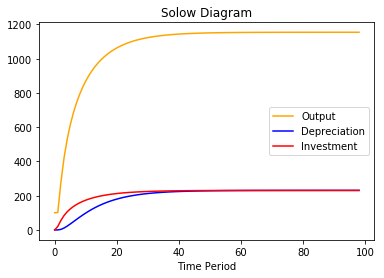

In [14]:
# Insert Python Code Here:
plt.plot(time, output, 'orange', label = 'Output')
plt.plot(time, depreciation, 'blue', label = 'Depreciation')
plt.plot(time, investment, 'red', label = 'Investment')
plt.title('Solow Diagram')
plt.xlabel('Time Period')
plt.legend()
plt.show()

## Q2) A Decrease in the Investment Rate

Suppose the country that was analyzed in the previous question enacts a tax policy that discourages investment, and the policy reduces the investment rate immediateley and permanently from $\bar{s}=0.2$ to $\bar{s}^{\prime}=0.1.$ Assuming the economy starts in its initial steady state (see Q1) part (b)), use the Solow model to explain what happens to the economy over time and in the long run. Using Python create a graph showing how output, capital, and investment evolve over time (i.e. put $Y_t$ on the vertical axis with a ratio scale and time on the horizontal axis), and explain what happens to each variable over time. 

__Answer:__

All of these variables were reduced by a downward shift.

## Q3) Technology Transfer in the Solow Growth Model

One explanation for China’s rapid economic growth during the past several decades is its expansion of policies that encourage "technology transfer." By this, we mean policies—such as opening up to international trade and attracting multinational corporations through various incentives—that encourage the use and adoption in China of new ideas and new technologies. This question asks you to use the Solow model to study this scenario.

Suppose China begins in steady state. To keep the problem simple, let’s assume the sole result of these technology transfer policies is to increase TFP from $\bar{A}=1$ to $\bar{A}=2$ permanently. Answer the following questions:

__(a)__: Using paper and pencil, draw the Solow diagram and __show__ what happens to China's output and capital stock. Also, make sure to note changes in steady state.

__(b)__: Create a graph using Python, showing what happens to output in China over time. Yes, use the parameters and variable values from Q1) as as your starting point.  What happens to output per person in China in the long run?

In [ ]:
# Python Code Here:

# For the solutions, please use 5 periods of steady state values before the change in A goes into effect. 
# That way students can see before and after clearly in the graph 

__(c)__: Create a graph showing what happens to the growth rate of output in China over time. Explain.

In [2]:
# Python Code Here:

Explain:

__(d)__: Discuss in a couple of sentences what your results imply about the effect of technology transfer on economic growth.

Explain:

## Q4) Foreign Aid

Continuing with the Solow economy we've been studying so far, suppose this country finds itself in it's steady state. To its pleasant surprise, the economy receives a generous gift of foreign aid in the form of $10$ billion worth of capital (electric power plants, machine tools, etc.), or equivalently a gift of $K_{gift}=10$. Use the Solow diagram (by hand), and the Python code we've built in this homework to explain and illustrate what happens to the economy, both immediately and over time.

__(a)__: By what proportion does consumption per person initially increase? What happens to consumption in the long run?

In [ ]:
# Python Code Here:

Explain:

__(b)__: Suppose instead of starting in its steady state, the economy begins below its steady state, with a capital stock equal to $K_{0}=5$. Answer the same questions as part (a) for this case.

In [ ]:
# Python Code Here:

Explain:

__(c)__: Summarize what this exercise teaches you about the possible consequences of foreign aid. In this example, does foreign aid exert a long-run effect on the welfare of poor countries? What is the benefit of foreign aid?

Explain:

## Q5) Predicting Steady States and Growth Rates:

Consider the data in the table below:

| Country       | Per capita GDP, 2014 | Investment Rate $\bar{s}$ (%) |TFP $\bar{A}$ |
|---------------|----------------------|-------------------------------|--------------|
| United States | 1.0                  | 24.7                          | 1.000        |
| Switzerland   | 1.147                | 31.1                          | 1.022        |
| Hong Kong     | 0.868                | 26.2                          | 0.853        | 
| France        | 0.719                | 25.0                          | 0.688        |  
| Japan         | 0.865                | 29.0                          | 0.680        |
| South Korea   | 0.673                | 35.0                          | 0.711        |
| Argentina     | 0.386                | 16.0                          | 0.534        |
| Mexico        | 0.299                | 21.1                          | 0.438        |
| Thailand       | 0.264                | 26.4                          | 0.381        |
| India         | 0.105                | 23.3                          | 0.240        |
| Kenya         | 0.057                | 11.1                          | 0.178        |
| Ethiopia      | 0.029                | 10.4                          | 0.102        |

__(a)__: Assuming no differences in TFP (ignore the last column) and that the rate of depreciation across countries is constant at $\bar{d}=0.03$, use the data in the table to predict the ratio of per capita GDP in each country relative to that in the United States in steady state.

In [5]:
# Python Code Here:

__(b)__: Now do the same exercise as part __(a)__ assuming TFP is given by the levels in the last
column of the table above. Discuss briefly the differences you find when you include vs not include TFP differences in your predictions. Which approach do you prefer and why?

In [ ]:
# Python Code Here:

Discuss:

__(c)__: Based on the numbers you calculated on part __(b)__, compute the percentage gap between the steady-state ratio of per capita GDP in each country relative to that in the United States and the actual ratio in 2010 (as shown in the table). Use the actual 2010 ratio in the denominator. How do your model-derived predictions compare to the data? Please discuss the strenghts and weaknesses of our model.

In [ ]:
# Python Code Here:

Discuss:

__(d)__: Apply the principle of transition dynamics to rank the countries in order of expected growth rate over the coming decades, from fastest to slowest. _(Hint: look at page 123 of the textbook for a refresher)_

In [ ]:
# Python Code Here:

## Q6) Growth Rates in the Solow Framework

__(a)__: Use the production function $Y_t = \bar{A}K_t^{1/3} L_t ^{2/3}$ and the rules for computing growth rates from page 53 of Chapter 3 to write the growth rate of per capita GDP as a function of the growth rate of the capital stock. (_Hint_: Because the labor force is constant, the growth rates of GDP and per capita GDP are the same.)

__(b)__: Combine this result with the last equation in footnote 7 (Section 5.9) to get a solution for the growth rate of per capita GDP as a function of the current level of capital $K_t$. Be sure to write your answer in terms of $K_t$ and parameters of the model only. Use the fact that $\space \bar{s}Y^*/K = \bar{d}$.